In [1]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt

# Used for data storage and manipulation 
import numpy as np
import pandas as pd

# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For stepwise regression
import statsmodels.api as sm

# box plots
import seaborn as sns
# pairplot
from seaborn import pairplot
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

In [2]:
data = pd.read_excel("climatechangedata.xlsx")

In [35]:
# return only rows where the year is greater than 1992
current = data[(data['Year'] > 1992)]

In [36]:
### model with Greenland, Co2, Surface temp ###
X = pd.DataFrame(current, columns = ['global_surface_temp_anomaly(celsius)', 'greenland_ice_mass_change', 'global_co2(in billion metric tons)'])
y = pd.DataFrame(current, columns=['adjusted_sea_level(in)'])

In [37]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

    global_surface_temp_anomaly(celsius)  greenland_ice_mass_change  \
10                                  1.15               -1563.584047   

    global_co2(in billion metric tons)  
10                               33.34  
    global_surface_temp_anomaly(celsius)  greenland_ice_mass_change  \
24                                  0.35                 157.888961   

    global_co2(in billion metric tons)  
24                               24.15  
    adjusted_sea_level(in)
10                8.834646
    adjusted_sea_level(in)
24                6.783465


In [38]:
# Create linear regression model
lm = LinearRegression()

# Fit linear regression
lm.fit(X_train, y_train)

# Make prediction on the testing data
pred = lm.predict(X_test)

In [39]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)

In [40]:
print(test_set_r2)

0.9412308230895144


In [41]:
# Get the slope and intercept of the line best fit.
lm.intercept_

array([3.29904097])

In [42]:
lm.coef_

array([[ 2.39698877e-01, -1.68271750e-04,  1.41982009e-01]])

In [43]:
intercept = 3.29904097
surftemp_coef = 2.39698877e-01
greenland_coef = -1.68271750e-04
co2_coef = 1.41982009e-01

In [ ]:
### set year variable ###

Year = 2022

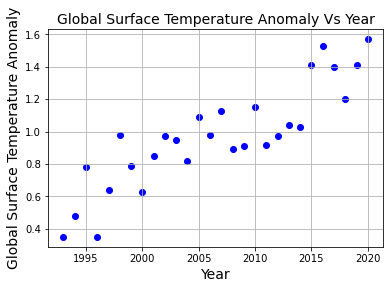

In [52]:
### Surface Temp vs Year ###
plt.scatter(data['Year'], data['global_surface_temp_anomaly(celsius)'], color='blue')
plt.title('Global Surface Temperature Anomaly Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Surface Temperature Anomaly', fontsize=14)
plt.grid(True)

In [65]:
### Equation: Global Surface Temp Anomaly(Celsius) = 0.0117089*Year + -22.7447 ###
Global_Surface_Temp_Anomaly = 0.0117089*Year + -22.7447


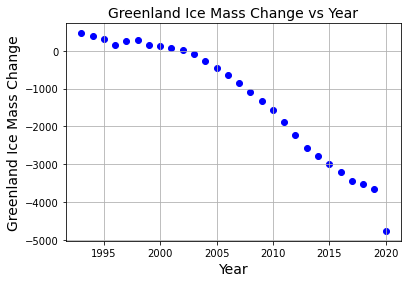

In [66]:
### Greenland vs Year ###
plt.scatter(data['Year'], data['greenland_ice_mass_change'], color='blue')
plt.title('Greenland Ice Mass Change vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Greenland Ice Mass Change', fontsize=14)
plt.grid(True)

In [67]:
### Equation: Greenland Ice Mass Change = -175.395*Year + 350645 ###
Greenland_Ice_Mass_Change = -175.395*Year + 350645

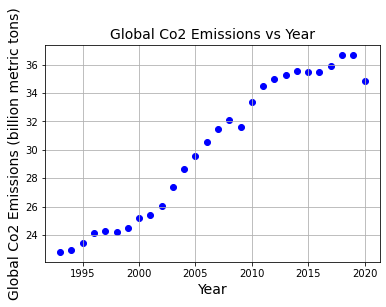

In [68]:
### Co2 vs Year ###
plt.scatter(data['Year'], data['global_co2(in billion metric tons)'], color='blue')
plt.title('Global Co2 Emissions vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Co2 Emissions (billion metric tons)', fontsize=14)
plt.grid(True)

In [69]:
### Equation: Global Co2(In Billion Metric Tons) = 0.58499*Year + -1143.64
Global_co2 = 0.58499*Year + -1143.64